# Статистика 5

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(20,8)}, style = 'whitegrid')

In [3]:
import scipy.stats as ss
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Описание данных  
5_task_1:

**id** – id клиента в эксперименте  
**group** – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)  
**events** – сколько блюд суммарно было заказано за период  

5_task_2:

**id** – id клиента в эксперименте  
**segment** – сегмент (high/low)  
**group** – вид кнопки (control – старая версия, test – новая версия)  
**events** – сколько блюд суммарно было заказано за период  

Задание 1. Нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

A – прямоугольные 16:9  
B – квадратные  
C – прямоугольные 12:4  

Каким статистическим тестом нужно воспользоваться для сравнения средних в данном случае?

Используем ANOVA т.к три группы

In [4]:
exp1 = pd.read_csv('/home/jupyter-a-berezin-18/Statistics/Datasets/5_task_1.csv')

In [5]:
exp1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


Задание 2. Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [7]:
a_pc = exp1.query('group == "A"').events
b_pc = exp1.query('group == "B"').events
c_pc = exp1.query('group == "C"').events

In [8]:
ss.levene(a_pc, b_pc, c_pc)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

p-value > 0.05, не отклоняем нулевую гипотезу

Задание 3. Убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

Дополнительно: попробуйте посчитать тест Шапиро-Уилка без использования метода sample. Сравните  результат с normaltest, а также qq-графиками. Какой вывод можно сделать по совокупности этих методов?

In [9]:
ss.shapiro(a_pc.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [10]:
ss.shapiro(b_pc.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [11]:
ss.shapiro(c_pc.sample(1000, random_state = 17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

Распределение events в группах A, B, C является нормальным

Задание 4. Проведите тест.

In [12]:
ss.f_oneway(a_pc, b_pc, c_pc)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [14]:
round(ss.f_oneway(a_pc, b_pc, c_pc)[0])

2886

Задание 5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [16]:
print(pairwise_tukeyhsd(exp1['events'], groups = exp1['group']).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Text(0, 0.5, 'Число покупок')

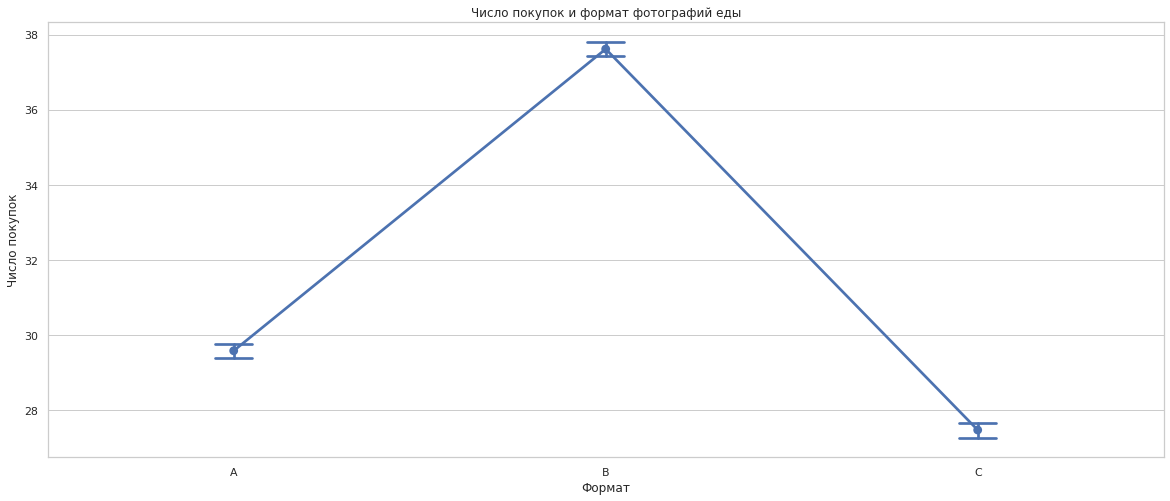

In [17]:
sns.pointplot(x = 'group', y = 'events', data = exp1, capsize = .1)
plt.title('Число покупок и формат фотографий еды')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

Будем использовать картинки B

Задание 6. Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.  
Какой метод скорее всего пригодится в данном случае?

In [18]:
exp2 = pd.read_csv('/home/jupyter-a-berezin-18/Statistics/Datasets/5_task_2.csv')

In [19]:
exp2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


Используем многофакторный дисперсионный анализ

Задание 7. Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


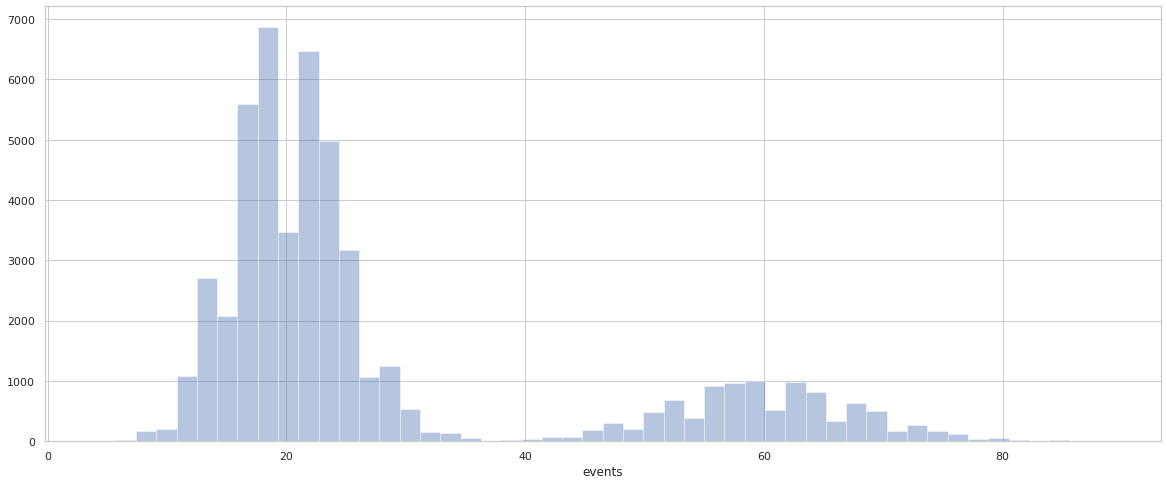

In [20]:
sns.distplot(exp2.query('group == "control"').events, kde = False)

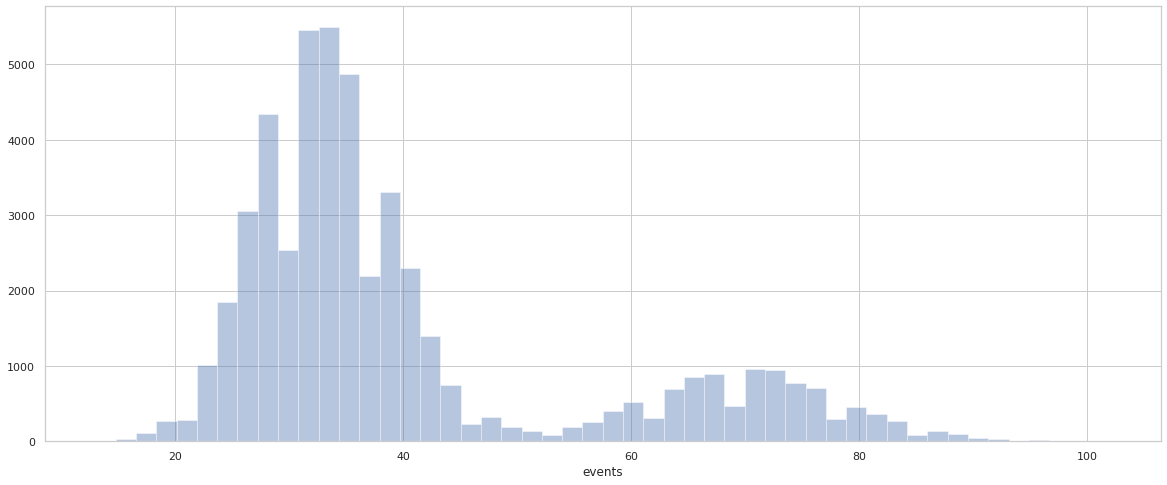

In [21]:
sns.distplot(exp2.query('group == "test"').events, kde = False)

Задание 8. Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [22]:
exp2.groupby(['group', 'segment']).events.describe().T.round(2)

group     control                test          
segment      high       low      high       low
count    10000.00  40000.00  10000.00  40000.00
mean        59.97     20.03     69.94     33.03
std          7.81      4.47      8.40      5.72
min         31.00      4.00     40.00     13.00
25%         55.00     17.00     64.00     29.00
50%         60.00     20.00     70.00     33.00
75%         65.00     23.00     76.00     37.00
max         89.00     41.00    102.00     59.00

7.81

Задание 9. Почти у цели – осталось выбрать формулу для модели. Напомним, что мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов.

Если вы прибегнете к statsmodels, то какую формулу используете?

 - events ~ segment + group + segment:group

Задание 10. Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey.

Между какими группами были обнаружены статистически значимые различия?

In [23]:
model = smf.ols(formula = 'events ~ segment + group + segment:group', data = exp2).fit()

In [25]:
aov_table = anova_lm(model, typ = 2)

In [27]:
print(round(aov_table, 2))

                    sum_sq       df          F  PR(>F)
segment        23624796.65      1.0  689756.38     0.0
group           3837195.41      1.0  112031.86     0.0
segment:group     36642.44      1.0    1069.82     0.0
Residual        3424955.89  99996.0        NaN     NaN


In [28]:
exp2['combination'] = exp2.group + ' \ ' + exp2.segment

In [29]:
exp2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [30]:
print(pairwise_tukeyhsd(exp2['events'], groups = exp2['combination']).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


Выводы:
 - Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой  
 - Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13  
 - Разница между control/high и test/high составила около 10

Задание 11. Визуализируйте результаты теста

Text(0, 0.5, 'Число покупок')

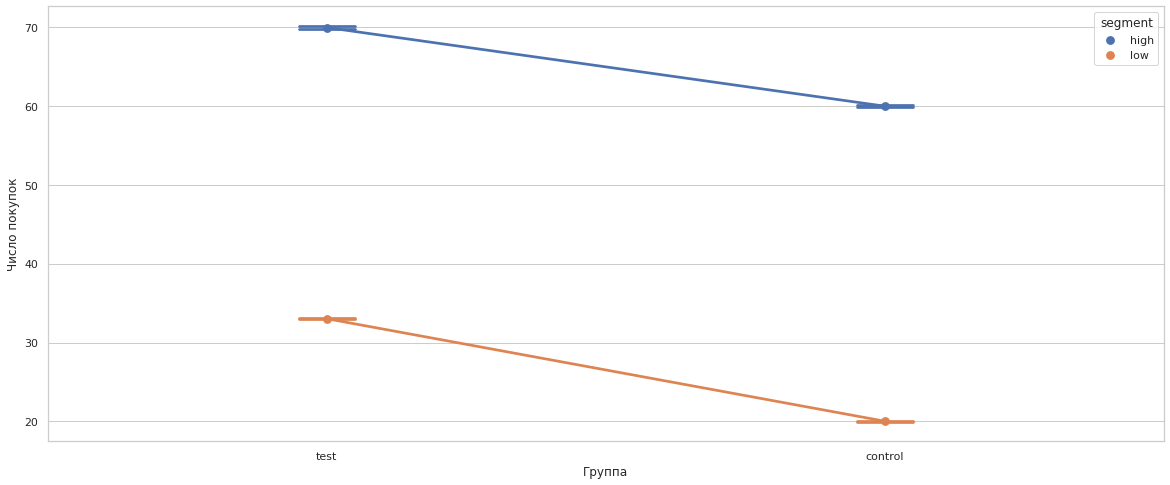

In [31]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = exp2, capsize = .1)
plt.xlabel('Группа')
plt.ylabel('Число покупок')

Фактор group оказался 
ЗНАЧИМЫМ
, фактор segment – 
ЗНАЧИМЫМ
, их взаимодействие – 
ЗНАЧИМО
. Судя по графику, для всех групп среднее значение events 
УВЕЛИЧИЛОСЬ
, поэтому решение: 
ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ